In [1]:
import numpy as np
from matplotlib import pyplot as plt
from otimo import QuasiNewton, GradienteConjugado, SecaoAurea
import time

# Comparação entre os métodos: Quasi-Newton e Gradiente Conjugado

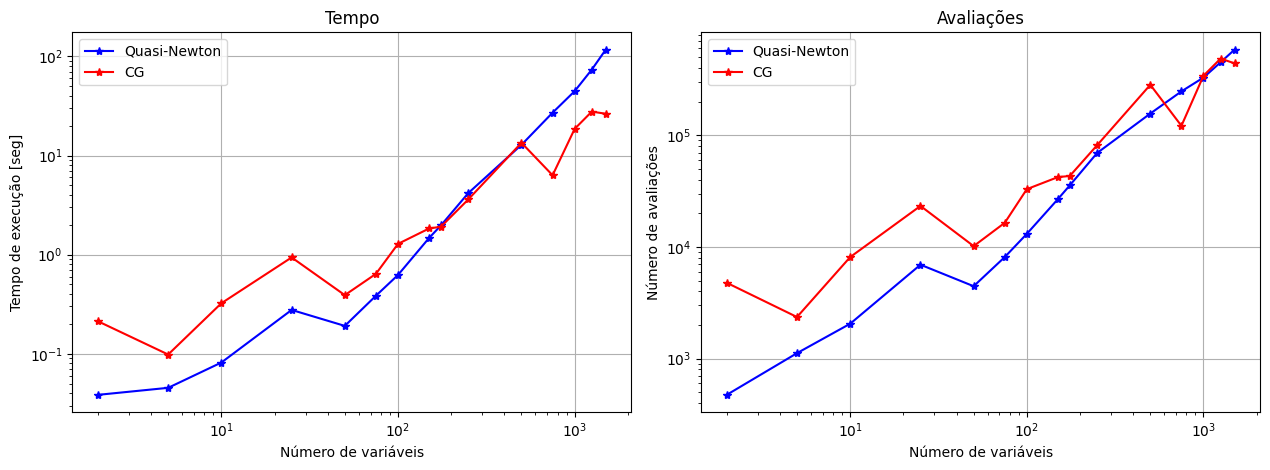

In [2]:
# Número de variáveis
N = [2, 5, 10 , 25, 50, 75, 100, 150, 175, 250, 500, 750, 1000, 1250, 1500]

# Registro do tempo de execução
tempo_quasi = np.zeros(len(N))
tempo_cg = np.zeros(len(N))

# Registro do número de avaliações
avaliacoes_quasi = np.zeros(len(N))
avaliacoes_cg = np.zeros(len(N))

# Parâmetros gerais
unidimensional = SecaoAurea(precisao=1e-2, passo=1e-3, maxaval=200)
maximo_iteracoes = 1e6
maximo_avaliacoes = 1e6
norma_gradiente = 1e-3

# Método Quasi-Newton
quasi = QuasiNewton(unidimensional=unidimensional, maxit=maximo_iteracoes,
                    maxaval=maximo_avaliacoes, precisao=norma_gradiente)

# Método Gradiente-Conjugado
cg = GradienteConjugado(unidimensional=unidimensional, maxit=maximo_iteracoes,
                        maxaval=maximo_avaliacoes, precisao=norma_gradiente)

# Definição da função-objetivo
def rosenbrock(x):
        return np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2)

for i in range(len(N)):
    
    # Ponto inicial
    x0 = -0.5*np.ones(N[i])
    
    # Execução do Método Quasi-Newton
    tic = time.time()
    solucao_quasi = quasi.resolva(rosenbrock, x0)
    toc = time.time()
    
    # Registra resultados
    tempo_quasi[i] = toc-tic
    avaliacoes_quasi[i] = solucao_quasi.aval
    
    # Execução do Método Gradiente Conjugado
    tic = time.time()
    solucao_cg = cg.resolva(rosenbrock, x0)
    toc = time.time()
    
    # Registra resultados
    tempo_cg[i] = toc-tic
    avaliacoes_cg[i] = solucao_cg.aval

# Exibe resultados de tempo
fig, axis = plt.subplots(ncols=2, figsize=[2*6.4, 4.8])
axis[0].loglog(N, tempo_quasi, '-*b', label='Quasi-Newton')
axis[0].loglog(N, tempo_cg, '-*r', label='CG')
axis[0].set_xlabel('Número de variáveis')
axis[0].set_ylabel('Tempo de execução [seg]')
axis[0].set_title('Tempo')
axis[0].grid()
axis[0].legend()

# Exibe resultados de número de avaliações
axis[1].loglog(N, avaliacoes_quasi, '-*b', label='Quasi-Newton')
axis[1].loglog(N, avaliacoes_cg, '-*r', label='CG')
axis[1].set_xlabel('Número de variáveis')
axis[1].set_ylabel('Número de avaliações')
axis[1].set_title('Avaliações')
axis[1].grid()
axis[1].legend()
plt.tight_layout()
plt.show()